In [1]:
import os
from PIL import Image
from Nyang_dataset import Nyang_Dataset
from Nyang_dataloader import Nyang_DataLoader
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
from typing import List, Tuple
from Nyang_utils import Nyang_split
from Nyang_utils import Nyang_images_grid


In [24]:
# Nyang_split을 사용하지 않은 custom dataset
class Mnist_CustomDataset(Nyang_Dataset):

    def __init__(self, root_dir, transform=None):
        super().__init__(transform=transform)
        
        self.data = []
        self.labels = []
        self.root_dir = root_dir

        for label in range(10):
            class_dir = os.path.join(self.root_dir, str(label))
            for image_name in os.listdir(class_dir):
                image_path = os.path.join(class_dir, image_name)
                self.data.append(image_path)
                self.labels.append(label)
    
    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image_path = self.data[idx]
        label = self.labels[idx]
        
        # 이미지 로드
        image = Image.open(image_path)

        # transform 적용
        if self.transform:
            image = self.transform(image)
            
        return image, label # dataloader와 호환을 위해서 image, label 순으로 뱉어주세요
    

In [25]:
# 데이터셋 생성
train_dataset = Mnist_CustomDataset(root_dir='mnist_data/train')
test_dataset = Mnist_CustomDataset(root_dir='mnist_data/test')

# 데이터 로더 생성
train_loader = Nyang_DataLoader(dataset=train_dataset, batch_size=32, shuffle=False)
test_loader = Nyang_DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)


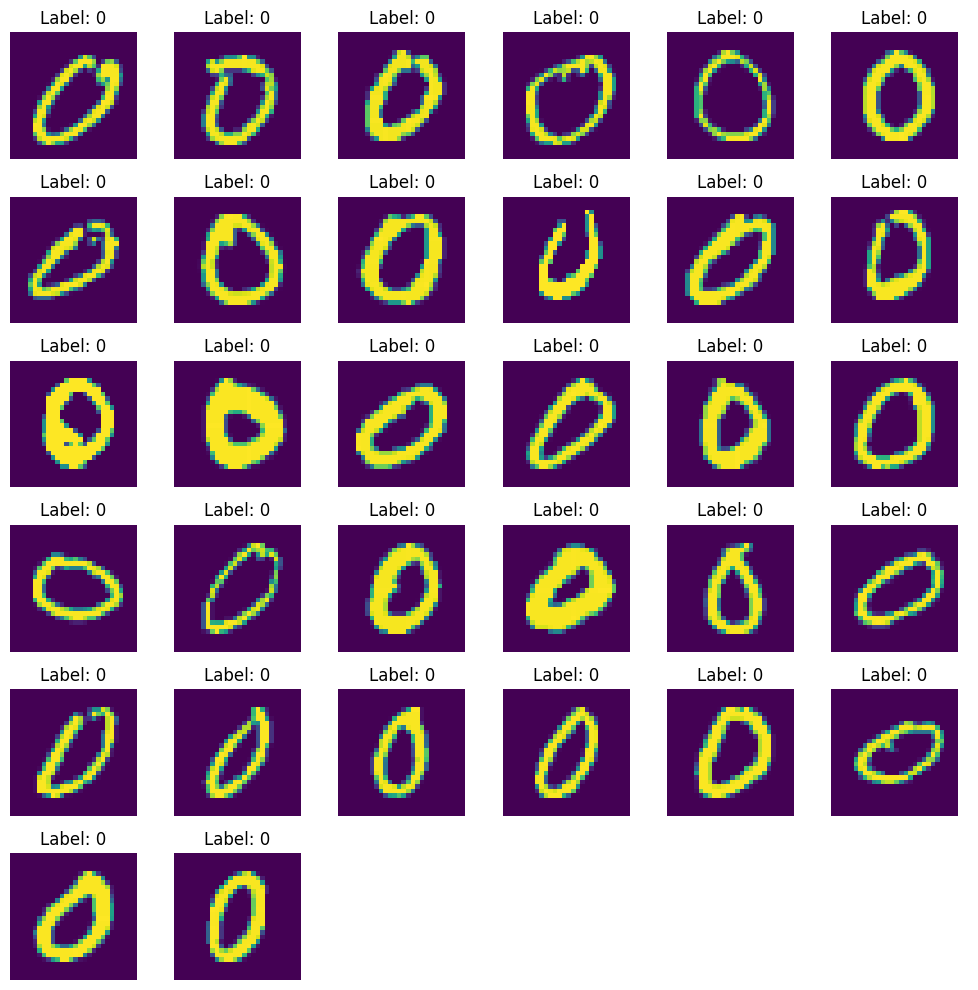

In [27]:
# dataloader test

# 첫 번째 배치 데이터 확인
for images, labels in test_loader: # or train_loader
    # 배치 내의 이미지 수
    batch_size = len(images)

    # 이미지의 제곱근을 기반으로 그리드 크기를 결정 (예: 32 -> 6x6 그리드)
    grid_size = math.ceil(math.sqrt(batch_size))

    fig, axes = plt.subplots(grid_size, grid_size, figsize=(10, 10))

    for i, (image, label) in enumerate(zip(images, labels)):
        ax = axes[i // grid_size, i % grid_size]
        ax.imshow(image)
        ax.set_title(f"Label: {label}")
        ax.axis('off')  # 축 정보 제거

    # 남은 서브플롯에 대한 표시 제거
    for i in range(batch_size, grid_size * grid_size):
        axes[i // grid_size, i % grid_size].axis('off')
    
    plt.tight_layout()
    plt.show()
    break

In [3]:
# Nyang_split을 사용한 Customdataset
# Nyang_split을 이용해 쉽게 Train,Valid,Test를 나눌 수 있습니다.
# one hot incoding 까지 자동으로 됩니다.

class CustomDataset(Nyang_Dataset):
    
    def __init__(self, root_dir, classes,transform = None, ratios = (0.8, 0.1, 0.1)):
        super().__init__(transform)
        self.train_data, self.valid_data, self.test_data = Nyang_split(root_dir, classes, ratios)
        self.data = self.train_data  # 기본적으로 train 데이터로 설정
        
    def set_mode(self, mode: str):
        if mode == "train":
            self.data = self.train_data
        elif mode == "valid":
            self.data = self.valid_data
        elif mode == "test":
            self.data = self.test_data
        else:
            raise ValueError("Invalid mode. Choose from ['train', 'valid', 'test']")
        
        return self # method chaining
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        image_path, label = self.data[idx]
        image = image_path
        if self.transform:
            image = self.transform(image_path)
        return image, label

In [8]:
# 데이터셋의 path와 class를 정의합니다.
root_dir = "Catdog_data/PetImages"
classes = ["Cat", "Dog"]

# CustomDataset 객체를 생성합니다.
dataset = CustomDataset(root_dir, classes)

# train mode
train_datset = dataset.set_mode("train")
print("Train dataset size:", len(train_datset))

# valid mode
valid_datset = dataset.set_mode("valid")
print("Valid dataset size:", len(valid_datset))

# test mode
test_dataset = dataset.set_mode("test")
print("Test dataset size:", len(test_dataset))

# checking
image1, label1 = dataset[0]
print("Sample image path:", image1)
print("Sample label:", label1)

Train dataset size: 18732
Valid dataset size: 2341
Test dataset size: 2342
Sample image path: Catdog_data/PetImages/Cat/5227.jpg
Sample label: [1, 0]


In [3]:
# 데이터셋의 path와 class를 정의합니다.
root_dir = "Catdog_data/PetImages"
classes = ["Cat", "Dog"]

# CustomDataset 객체를 생성합니다.
dataset = CustomDataset(root_dir, classes)
dataset.set_mode("train")  # train 모드로 설정

# Nyang_DataLoader 객체를 생성합니다.
batch_size = 32
shuffle = True
data_loader = Nyang_DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)

# 첫 번째 배치의 이미지들과 레이블을 그리드 형태로 시각화합니다.
images, labels = next(iter(data_loader))
Nyang_images_grid(images, labels, classes, nrows=5, ncols=5)


TypeError: subplots() takes from 0 to 2 positional arguments but 3 were given

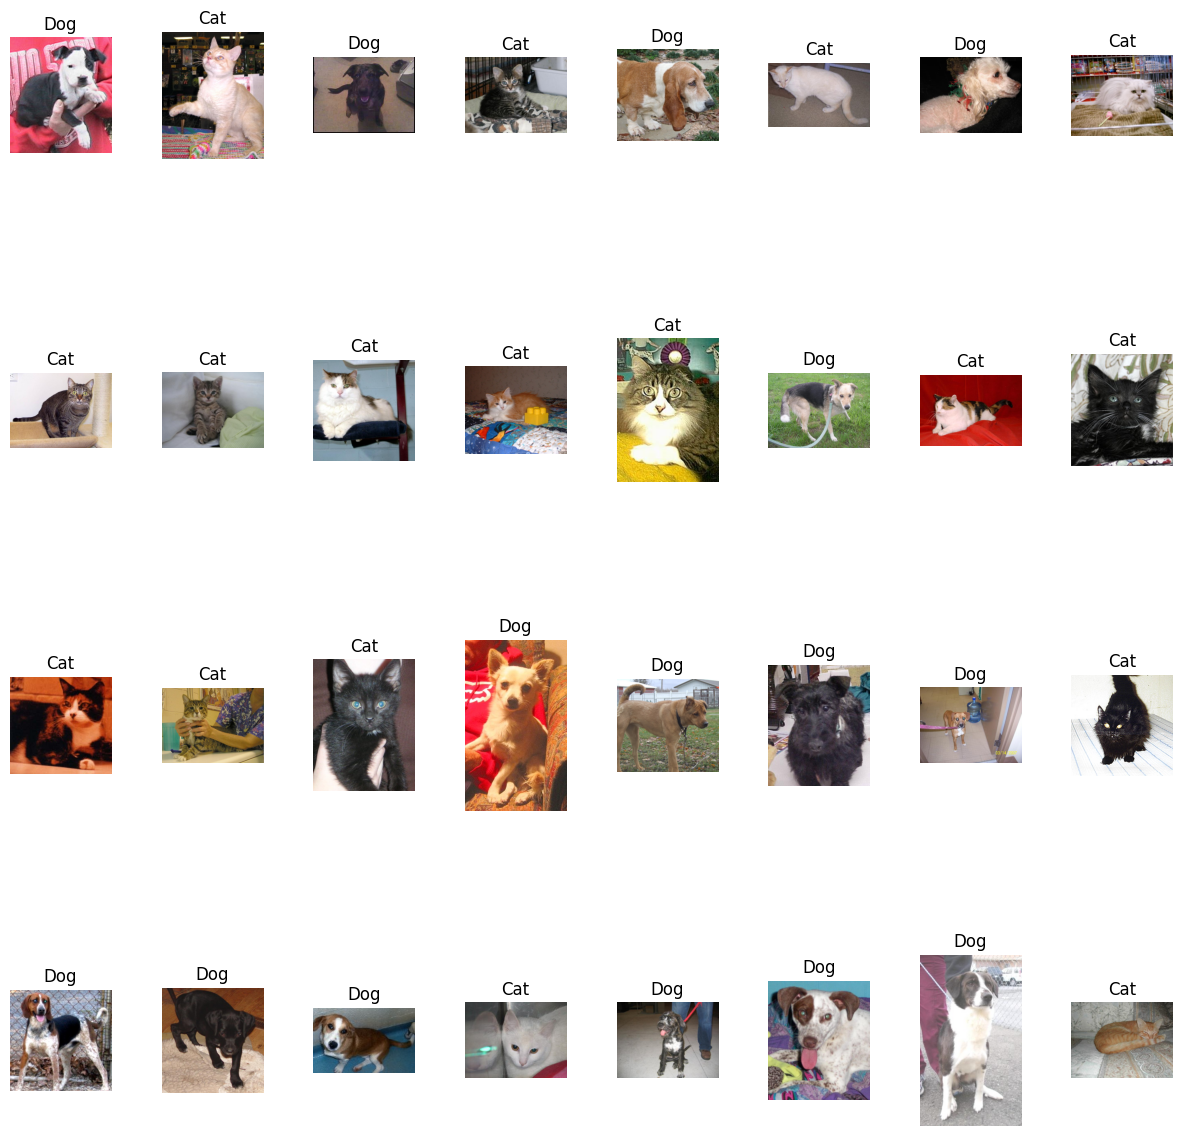

In [5]:
# 데이터셋의 path와 class를 정의합니다.
root_dir = "Catdog_data/PetImages"
classes = ["Cat", "Dog"]

# CustomDataset 객체를 생성합니다.
dataset = CustomDataset(root_dir, classes)
dataset.set_mode("train")  # train 모드로 설정

# Nyang_DataLoader 객체를 생성합니다.
batch_size = 32
shuffle = True
data_loader = Nyang_DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)

# 첫 번째 배치의 이미지들과 레이블을 그리드 형태로 시각화합니다.
images, labels = next(iter(data_loader))




Nyang_images_grid(images, labels,classes, nrows=4, ncols=8)





